### Advantages of genetic algorithm

In [1]:
import numpy as np
import six
import sys

sys.modules['sklearn.externals.six'] = six
import mlrose
from matplotlib import pyplot as plt

In [2]:
def plot(fitness_curve):
    xticks = np.arange(fitness_curve.shape[0])
    plt.plot(fitness_curve)
    plt.yticks(fitness_curve)
    plt.xticks(xticks)
    plt.show()

In [3]:
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                    and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

### Loop through all algos with different random state

In [4]:
max_attempts = 5
max_iters = 10
max_val = 8
history = False


rhc = {}
sa = {}
ga = {}
mimic = {}

rhc['best_state'] = []
rhc['best_fitness'] = []
rhc['fitness_curve'] = []

sa['best_state'] = []
sa['best_fitness'] = []
sa['fitness_curve'] = []

ga['best_state'] = []
ga['best_fitness'] = []
ga['fitness_curve'] = []

mimic['best_state'] = []
mimic['best_fitness'] = []
mimic['fitness_curve'] = []

schedule = mlrose.ExpDecay()
problem = mlrose.DiscreteOpt(length = max_val, fitness_fn = fitness_cust, 
                                 maximize = True, max_val = max_val)
Total_Runs = 15
for i in range(Total_Runs):
    random_state = i
    init_state = np.random.randint(0, max_val, size=(max_val,))

    # Solve problem using randomized hill climbing
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                                                                   max_iters=max_iters, restarts=1, 
                                                                   init_state=init_state, curve=history, 
                                                                   random_state=random_state)
    rhc['best_state'].append(best_state)
    rhc['best_fitness'].append(best_fitness)  
    
    # Solve problem using simulated annealing
    best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      init_state = init_state, curve=history, 
                                                        random_state = random_state)
    sa['best_state'].append(best_state)
    sa['best_fitness'].append(best_fitness)
    
    # Solve problem using genetic algorithm
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=200, 
                                              mutation_prob=0.3, max_attempts=max_attempts, 
                                              max_iters=max_iters, curve=history, random_state=random_state)
    ga['best_state'].append(best_state)
    ga['best_fitness'].append(best_fitness)

    # Solve problem using MIMIC
    best_state, best_fitness = mlrose.mimic(problem, pop_size=200, 
                                        keep_pct=0.2, max_attempts=max_attempts, 
                                        max_iters=max_iters, curve=history, random_state=random_state, 
                                        fast_mimic=False)
    mimic['best_state'].append(best_state)
    mimic['best_fitness'].append(best_fitness)

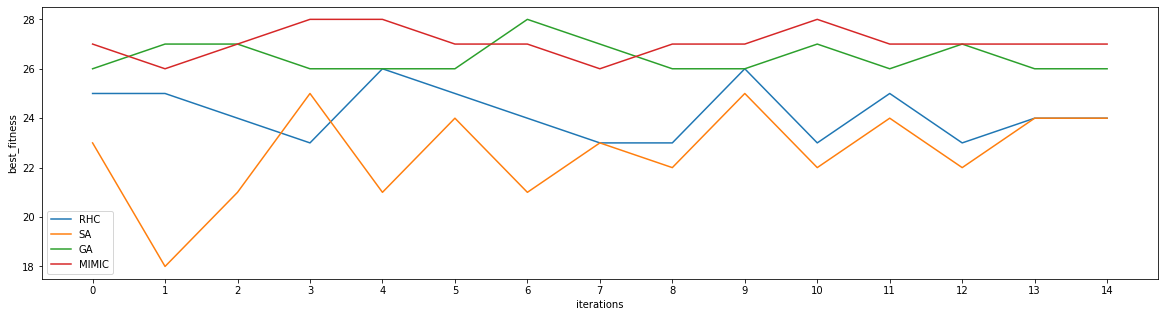

In [5]:
x = list(range(len(rhc['best_fitness'])))
plt.figure(figsize=(20,5))
plt.plot(x, rhc['best_fitness'], label="RHC")
plt.plot(x, sa['best_fitness'], label="SA")
plt.plot(x, ga['best_fitness'], label="GA")
plt.plot(x, mimic['best_fitness'], label="MIMIC")


plt.xticks(x)
plt.xlabel('iterations')
plt.ylabel('best_fitness')

plt.legend()

plt.show()

In [6]:
max_attempts = 5
max_iters = 10
history = True
random_state = 1


# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])


In [7]:
problem = mlrose.DiscreteOpt(length = init_state.shape[0], fitness_fn = fitness_cust, 
                                 maximize = True, max_val = 8)

### Genetic Algorithm

[2 4 6 0 3 1 5 7]
27.0


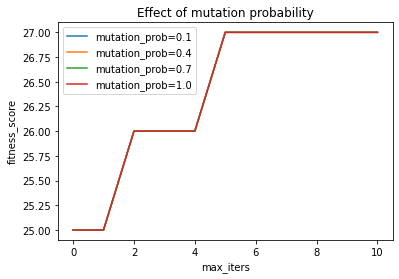

CPU times: user 2.77 s, sys: 51.9 ms, total: 2.82 s
Wall time: 2.83 s


In [14]:
%%time

rLow = 0.1
rHigh = 1.0
rStep = 4

max_attempts = 5
max_iters = 20
log_fitness = []
for mutation_prob in np.linspace(rLow, rHigh, rStep):
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, 
                                                  mutation_prob=0.3, max_attempts=max_attempts, 
                                                  max_iters=max_iters, curve=history, random_state=random_state)
    log_fitness.append(fitness_curve)

print(best_state)
print(best_fitness)

# plt.xticks(x)
plt.xlabel('max_iters')
plt.ylabel('fitness_score')

for index, mutation_prob in enumerate(np.linspace(rLow, rHigh, rStep)):
    plt.plot(log_fitness[index], label="mutation_prob="+str(mutation_prob))
plt.title('Effect of mutation probability')    
plt.legend()
plt.show()

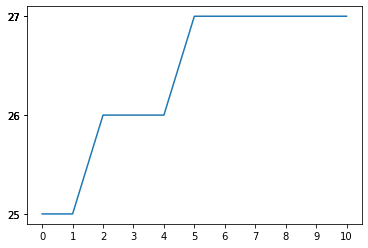

In [15]:

plot(fitness_curve)



### Randomized Hill Climbing

In [22]:
%%time
max_attempts = 5
max_iters = 100

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                                                                   max_iters=max_iters, restarts=3, 
                                                                   init_state=init_state, curve=history, 
                                                                   random_state=random_state)

CPU times: user 10.8 ms, sys: 1.45 ms, total: 12.2 ms
Wall time: 10.9 ms


[1 6 3 7 2 5 2 4]
25.0


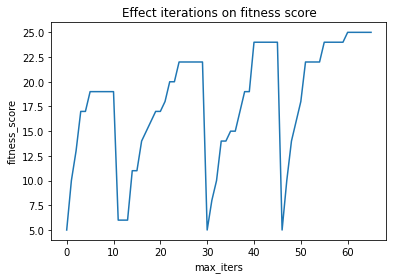

In [23]:
print(best_state)
print(best_fitness)

plt.xlabel('max_iters')
plt.ylabel('fitness_score')

plt.plot(fitness_curve)
plt.title('Effect iterations on fitness score')    
plt.show()

### Simulated Annealing

[0 4 1 7 2 2 6 1]
25.0


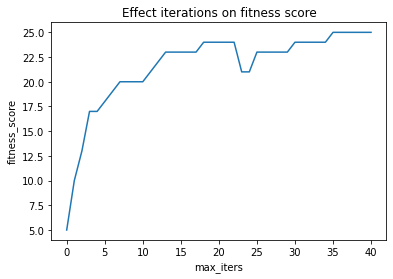

CPU times: user 355 ms, sys: 34.9 ms, total: 390 ms
Wall time: 390 ms


In [24]:
%%time
random_state = 1
max_attempts = 5
max_iters = 100
# Define decay schedule
schedule = mlrose.ExpDecay()

# Solve problem using simulated annealing
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      init_state = init_state, curve=history, 
                                                      random_state = random_state)

print(best_state)
print(best_fitness)

plt.xlabel('max_iters')
plt.ylabel('fitness_score')

plt.plot(fitness_curve)
plt.title('Effect iterations on fitness score')    
plt.show()

[3 7 0 5 6 1 5 2]
25.0


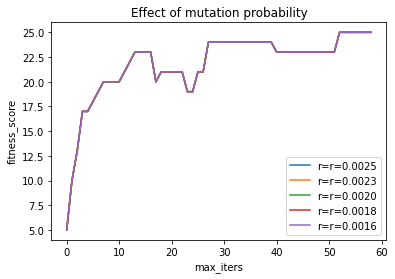

In [26]:
random_state = 1
max_attempts = 5
max_iters = 100
log_fitness = []

# Define decay schedule
schedule0 = mlrose.ExpDecay(exp_const=0.0025, min_temp=0.0005)
schedule1 = mlrose.ExpDecay(exp_const=0.0023)
schedule2 = mlrose.ExpDecay(exp_const=0.0020)
schedule3 = mlrose.ExpDecay(exp_const=0.0018)
schedule4 = mlrose.ExpDecay(exp_const=0.0016)

schedules = [schedule0, schedule1, schedule2, schedule3, schedule4]
sched_names = ["r=0.0025", "r=0.0023", "r=0.0020", "r=0.0018", "r=0.0016"]

for sched in schedules:
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = sched,
                                                          max_attempts = max_attempts, max_iters = max_iters,
                                                          init_state = init_state, curve=history, 
                                                          random_state = random_state)
    log_fitness.append(fitness_curve)

print(best_state)
print(best_fitness)

plt.xlabel('max_iters')
plt.ylabel('fitness_score')

for index, sched in enumerate(schedules):
    plt.plot(log_fitness[index], label="r="+str(sched_names[index]))
plt.title('Effect of temperature')    
plt.legend()
plt.show()

### MIMIC

[7 4 1 0 6 3 6 2]
26.0


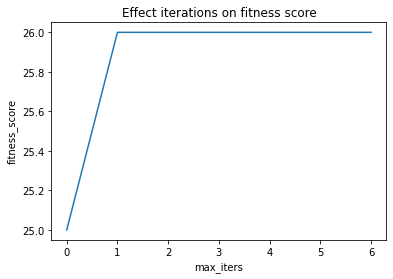

CPU times: user 692 ms, sys: 21.4 ms, total: 714 ms
Wall time: 706 ms


In [27]:
%%time

random_state = 1
max_attempts = 5
max_iters = 100
history = True

# Solve problem using simulated annealing
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200, 
                                        keep_pct=0.2, max_attempts=max_attempts, 
                                        max_iters=max_iters, curve=history, random_state=random_state, 
                                        fast_mimic=False)

print(best_state)
print(best_fitness)

plt.xlabel('max_iters')
plt.ylabel('fitness_score')

plt.plot(fitness_curve)
plt.title('Effect iterations on fitness score')    
plt.show()

In [ ]:
print(best_state)
print(best_fitness)
plot(fitness_curve)